In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Cardiotocographic.csv'
data = pd.read_csv(file_path)

# Handle missing values (mean imputation)
data_filled = data.fillna(data.mean())

# Detect and handle outliers using IQR
Q1 = data_filled.quantile(0.25)
Q3 = data_filled.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_cleaned = data_filled[~((data_filled < (Q1 - 1.5 * IQR)) | (data_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

In [3]:
# Generate statistical summary
statistical_summary = data_cleaned.describe()
print(statistical_summary)

               LB          AC          FM          UC          DL     DS  \
count  883.000000  883.000000  883.000000  883.000000  883.000000  883.0   
mean   131.842621    0.004071    0.000603    0.004952    0.001545    0.0   
std      9.461012    0.003726    0.001337    0.002718    0.002218    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003098    0.000000    0.0   
50%    133.000000    0.003350    0.000000    0.005051    0.000000    0.0   
75%    138.000000    0.006719    0.000336    0.006927    0.003084    0.0   
max    160.000000    0.013861    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  883.0  883.000000  883.000000  883.000000  883.000000  883.000000   
mean     0.0   42.401260    1.271275    3.170071    8.613856   67.795732   
std      0.0   15.079872    0.538496    6.036208    4.487502   32.607863   
min      0.

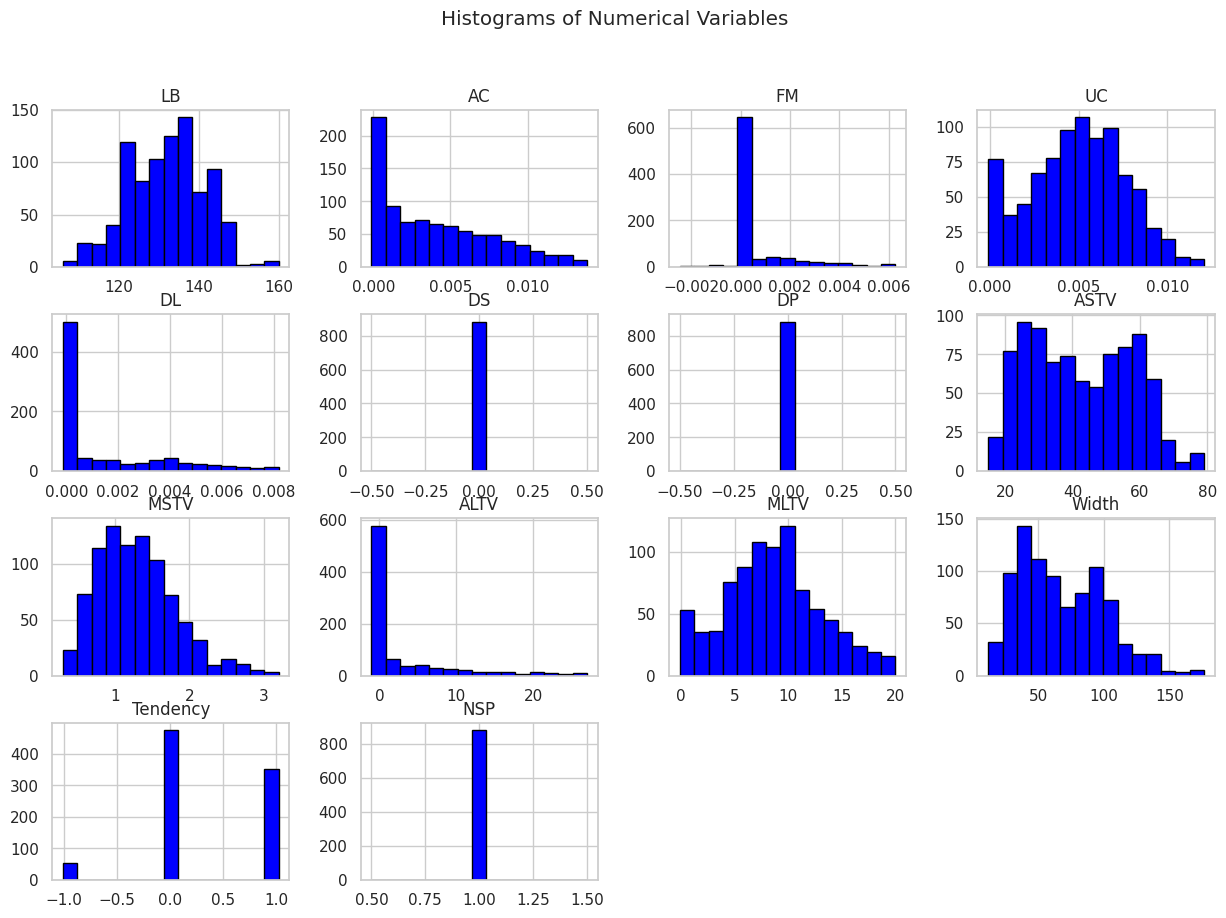

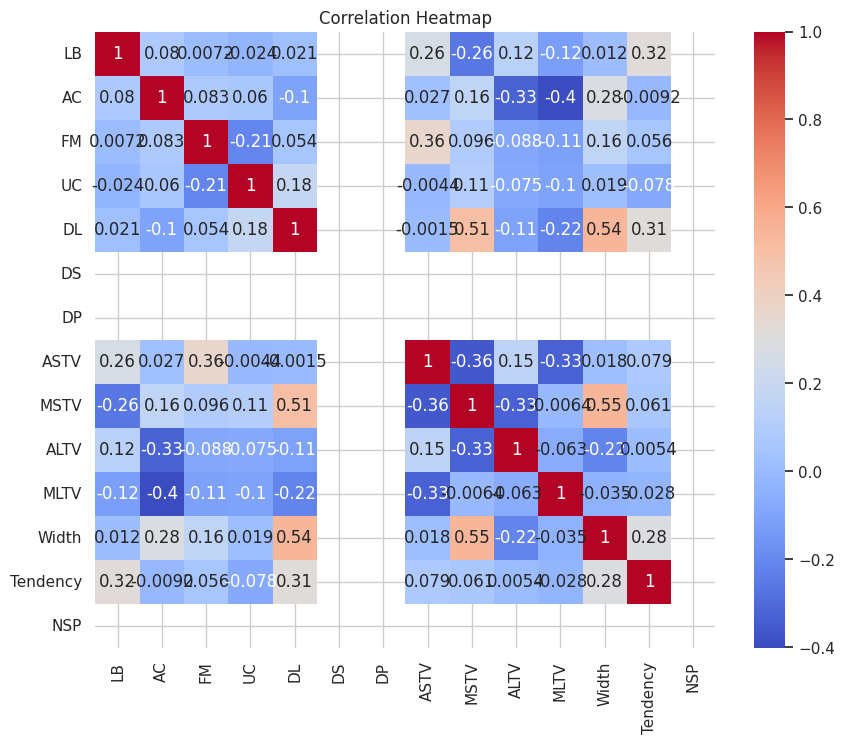

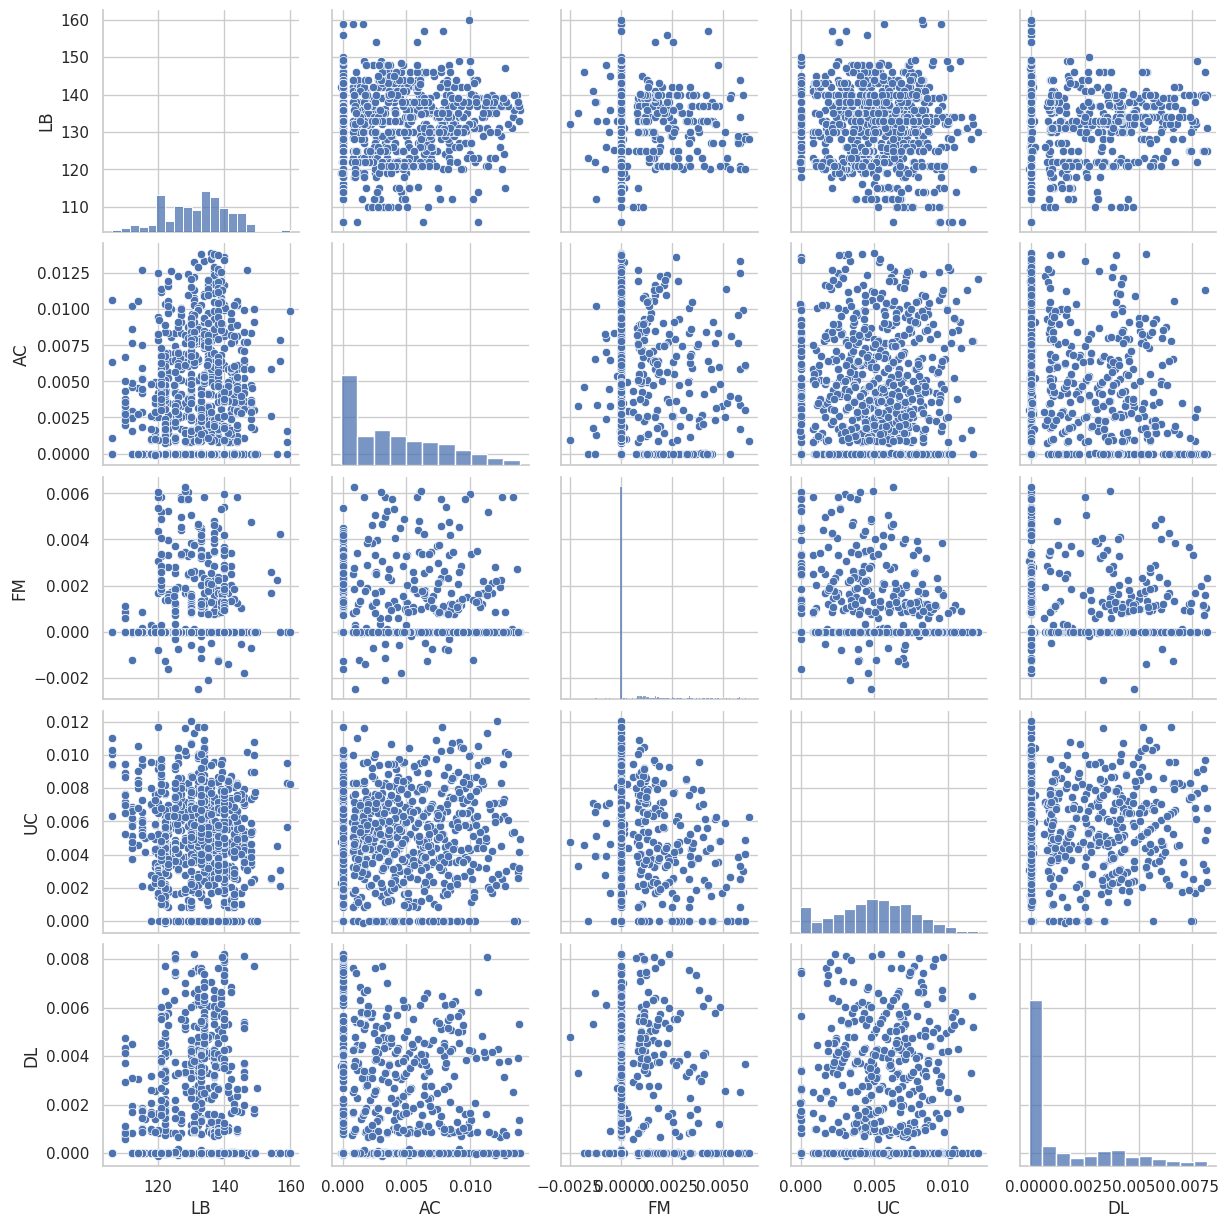

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Histogram for numerical variables
data_cleaned.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
key_columns = ['LB', 'AC', 'FM', 'UC', 'DL']
sns.pairplot(data_cleaned[key_columns])
plt.show()

In [5]:
# Identify correlations
correlations = data_cleaned.corr()

# Extract significant correlations (example threshold > 0.5)
significant_correlations = correlations[(correlations > 0.5) & (correlations != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)
print("Significant Correlations:")
print(significant_correlations)

Significant Correlations:
             DL      MSTV     Width
DL          NaN  0.506833  0.540652
MSTV   0.506833       NaN  0.545244
Width  0.540652  0.545244       NaN
